# Assignment Honour Code

I solemnly swear that I have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: Ancy Rex

# QUESTION 1

### Loading the Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import requests
import matplotlib.pyplot as plt

# loading the data from data file
train_pf = './data/A3_Q1_train.csv'
train_data = pd.read_csv(train_pf)
train_data=pd.DataFrame(train_data)
# new dataset created for working
train_copy =pd.DataFrame(train_data.copy())
train_copy.head(10)

,row_id,age,education_years,workclass,marital_status,occupation,annual_income
0,1,48,14,Local-gov,Divorced,Prof-specialty,high_income
1,2,23,13,Local-gov,Never-married,Prof-specialty,low_income
2,3,45,13,Local-gov,Never-married,Prof-specialty,low_income
3,4,51,13,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,5,51,14,Local-gov,Married-civ-spouse,Prof-specialty,high_income
5,6,21,9,Local-gov,Never-married,Prof-specialty,low_income
6,7,44,15,Federal-gov,Divorced,Prof-specialty,high_income
7,8,30,13,Local-gov,Never-married,Prof-specialty,low_income
8,9,55,13,Federal-gov,Married-civ-spouse,Exec-managerial,high_income
9,10,34,10,State-gov,Divorced,Adm-clerical,low_income


### PART A ( Data Preparation )

##### TASK 1

Transforming numerical columns such as education_years and age into categorical features using equal-width binning. The 3 bins used to transform both these columns were 'low', 'mid' and 'high'. After transformation the dataset contains 5 categorical comlumns.

In [2]:
# Transforming education_years into categorical column
train_copy['education_years']= pd.cut(train_copy['education_years'],3,labels=["low","mid","high"])

# Transforming education_years into categorical column
train_copy['age']= pd.cut(train_copy['age'],3,labels=["low","mid","high"])

# Dataset renamed to df_all_cat
df_all_cat=pd.DataFrame(train_copy)

In [3]:
# so that we can see all the columns
pd.set_option('display.max_columns', None) 
print(df_all_cat.shape)
df_all_cat.head()
###
# please run below in a separate cell!!!
for col in df_all_cat.columns.tolist():  
    print(col + ':')
    print(df_all_cat[col].value_counts())
    print('********')

(500, 7)
row_id:
500    1
171    1
158    1
159    1
160    1
161    1
162    1
163    1
164    1
165    1
166    1
167    1
168    1
169    1
170    1
172    1
187    1
173    1
174    1
175    1
176    1
177    1
178    1
179    1
180    1
181    1
182    1
183    1
184    1
185    1
      ..
315    1
343    1
316    1
317    1
318    1
319    1
320    1
321    1
322    1
323    1
324    1
325    1
326    1
327    1
328    1
329    1
330    1
331    1
332    1
333    1
334    1
335    1
336    1
337    1
338    1
339    1
340    1
341    1
342    1
1      1
Name: row_id, Length: 500, dtype: int64
********
age:
mid     230
low     140
high    130
Name: age, dtype: int64
********
education_years:
high    304
mid     193
low       3
Name: education_years, dtype: int64
********
workclass:
Local-gov      225
State-gov      148
Federal-gov    127
Name: workclass, dtype: int64
********
marital_status:
Married-civ-spouse    230
Never-married         155
Divorced              115
Name: marita

#### TASK 2

One-hot encoding was done on the dataset after equal-width binning. The columns annual_income which is the target column and row_id was dropped to perform encoding on the dataset.

In [4]:
# dropping of annual_income and row_id
df_encoding = df_all_cat.drop(['annual_income','row_id'],axis=1)

In [5]:
# get the list of categorical descriptive features
categorical_cols = df_encoding.columns[df_encoding.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(df_encoding[col].unique())
    if (n == 2):
        df_encoding[col] = pd.get_dummies(df_encoding[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
df_all_cat_ohe = pd.get_dummies(df_encoding)


The values in the target column was later replaced with binary values. low_income and high_income was replaced with 0 and 1 respectively.

In [6]:
# replacing binary values for low_income and high_income
target = df_all_cat.pop('annual_income')
target_encoded = pd.Series(target).replace({'low_income':0,'high_income':1}).values

All the categorical columns were encoded. Before fitting any model the dataset df_all_cat_ohe was scaled using MinMax scaling. Each of the descriptive feature was scaled to be a value between 0 and 1.

In [7]:
from sklearn import preprocessing

# MinMax scaling on df_all_cat_ohe dataset
df_all_cat_ohe = preprocessing.MinMaxScaler().fit_transform(df_all_cat_ohe)
df_all_cat_ohe = pd.DataFrame(data = df_all_cat_ohe)


In [8]:
# shape and few columns of df_all_cat_ohe dataframe was displayed
print(df_all_cat_ohe.shape)
df_all_cat_ohe.head()

(500, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### PART B ( Bernoulli NB )

The Bernoulli NB model was trained using the train data with default parameters. The accuracy of the Bernoulli NB model was computed. 

In [9]:
# X and Y was intialised to data and replaced target respectively
X = df_all_cat_ohe
Y = target_encoded

# Bernoulli NB model fitting
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB()

# accuracy of the Bernoulli NB model
print("Accuracy of Bernoulli NB is : ",clf.score(X, Y))

Accuracy of Bernoulli NB is :  0.83


After implementing Bernoulli NB , where the df_all_cat_ohe data was used to train the model and we obtained an accuracy of 0.83.

### PART C ( Gaussian NB )

The Gaussian NB model was trained using the train data with default parameters. The accuracy of the Gaussian NB model was computed. 

In [10]:
# Data and Target was intialised to data and replaced target respectively
Data = df_all_cat_ohe
Target = target_encoded

np.unique(Target,return_counts = True)

(array([0, 1]), array([320, 180]))

In [11]:
from sklearn.naive_bayes import GaussianNB

# Gaussian NB model fitting
clf_gaussian = GaussianNB(var_smoothing=1e-09)
clf_gaussian.fit(Data, Target)

print("Accuracy of Gaussian NB is : ",clf_gaussian.score(Data, Target))


Accuracy of Gaussian NB is :  0.728


After implementing Gaussian NB , where the df_all_cat_ohe data was used to train the model and we obtained an accuracy of 0.728.

### Part D ( Tuning your Models )

Fine-tunning the hyperparameters of both Bernoulli and Gaussian NB models were done.  The tuning results were displayed using plots.

#### TASK 1 : Tuning

The paramters of both Bernoulli and gaussian models were fine-tuned in this task.

In [12]:
import sklearn.metrics as metrics 

##### Tuning the alpha parameter of the Bernoulli NB model

The classifiers were tuned based on their paramters, in the case of Bernoulli NB the alpha paramter. A 'for loop' was used to loop through the parameter using a range of values. The values were then inserted into a dataframe with columns as range of parameter values and corresponding score values.

In [13]:
# creating a result dataset for plotting the score values
Bernoulli_results = pd.DataFrame(columns=['alpha', 'accuracy'])

# for loop for looping through the paramter using a range of values
for alpha in (0,1):
    classifier_bernoulli = BernoulliNB(alpha=alpha)
    classifier_bernoulli.fit(X,Y)
    predict_bernoulli = classifier_bernoulli.predict(X)
    score_bernoulli = classifier_bernoulli.score(X,Y)
    cv_score_bernoulli = metrics.accuracy_score(Y,predict_bernoulli)
    print("Accuracy of Bernoulli NB is :",score_bernoulli)
    Bernoulli_results = Bernoulli_results.append(pd.DataFrame({'alpha':alpha, 'accuracy':cv_score_bernoulli},index=[alpha]))


Accuracy of Bernoulli NB is : 0.83
Accuracy of Bernoulli NB is : 0.83


The optimal accuracy for Bernoulli NB was obtained for both alpha value 0 and 1,as an accuracy of 0.83.

##### Tuning the var_smoothing parameter of the Gaussian NB model

The classifiers were tuned based on their paramters, in the case of Gaussian NB the var_smoothing paramter. A 'for loop' was used to loop through the paramter using a range of values. The values were then inserted into a dataframe with columns as range of parameter values and corresponding score values.

In [14]:
# creating a result dataset for plotting the score values
Gaussian_results = pd.DataFrame(columns=['var_smoothing', 'accuracy'])

# for loop for looping through the paramter using a range of values
for i in range(0,10):
    classifier_gaussian = GaussianNB(var_smoothing=10**(-i))
    classifier_gaussian.fit(Data,Target)
    predict_gaussian = classifier_gaussian.predict(Data)
    score_gaussian = classifier_gaussian.score(Data, Target)
    cv_score_Gaussian = metrics.accuracy_score(Target,predict_gaussian)
    print("Accuracy of Gaussian NB for :",10**(-i),"is :",score_gaussian)
    Gaussian_results = Gaussian_results.append(pd.DataFrame({'var_smoothing':(10**(-i)), 'accuracy':cv_score_Gaussian},index = [i]))


Accuracy of Gaussian NB for : 1 is : 0.832
Accuracy of Gaussian NB for : 0.1 is : 0.83
Accuracy of Gaussian NB for : 0.01 is : 0.828
Accuracy of Gaussian NB for : 0.001 is : 0.826
Accuracy of Gaussian NB for : 0.0001 is : 0.824
Accuracy of Gaussian NB for : 1e-05 is : 0.812
Accuracy of Gaussian NB for : 1e-06 is : 0.8
Accuracy of Gaussian NB for : 1e-07 is : 0.798
Accuracy of Gaussian NB for : 1e-08 is : 0.75
Accuracy of Gaussian NB for : 1e-09 is : 0.728


The optimal accuracy for Gaussian NB was obtained for the var_smoothing value 1, which has an accuracy of 0.832.

#### TASK 2 : Plotting

The tuning results were then displayed using plot with appropriate axes labels and titles.

##### Plotting for Bernoulli NB model

The tuning results of Bernoulli NB model was displayed using a plot with x axis labeling alpha paramter values and y labels the mean cv score values.

In [15]:
# the dataframe that contains the alpha parameter values with test score values
Bernoulli_results

,alpha,accuracy
0,0,0.83
1,1,0.83


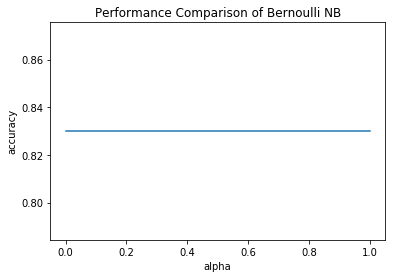

In [16]:
# plot used to display the tuning result of Bernoulli NB model
plt.plot(Bernoulli_results['alpha'],Bernoulli_results['accuracy'])
plt.title("Performance Comparison of Bernoulli NB")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

##### Plotting for Gaussian NB model

The tuning results of Gaussian NB model was displayed using a plot with x axis labeling var_smoothing paramter values and y labels the mean cv score values.

In [17]:
# the dataframe that contains the var_smoothing parameter values with test score values
Gaussian_results

,var_smoothing,accuracy
0,1,0.832
1,0.1,0.830
2,0.01,0.828
3,0.001,0.826
4,0.0001,0.824
5,1e-05,0.812
6,1e-06,0.800
7,1e-07,0.798
8,1e-08,0.750
9,1e-09,0.728


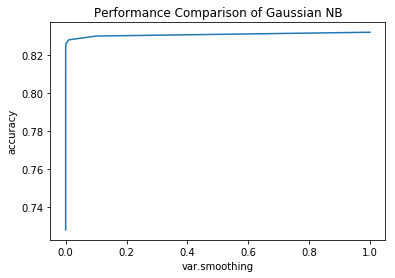

In [18]:
# plot used to display the tuning result of Gaussian NB model
plt.plot(Gaussian_results['var_smoothing'],Gaussian_results['accuracy'])
plt.title("Performance Comparison of Gaussian NB")
plt.xlabel('var.smoothing')
plt.ylabel('accuracy')
plt.show()

### Part E ( Hybrid NB )

Implementing Hybrid NB using Bernoulli NB for categorical descriptive features and Gaussian NB for numerical descriptive features. 
The data was encoded using one-hot encoding after the target and id column of the data was dropped. Then the model was trained using the training data and the accuracy of the hybrid model was computed.

In [19]:
# dropping the target and id columns
df_hybrid_nb = train_data.drop(['annual_income','row_id'],axis=1)

In [20]:
# get the list of categorical descriptive features
categorical_cols = df_hybrid_nb.columns[df_hybrid_nb.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(df_hybrid_nb[col].unique())
    if (n == 2):
        df_hybrid_nb[col] = pd.get_dummies(df_hybrid_nb[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
df_hybrid_nb = pd.get_dummies(df_hybrid_nb)


In [21]:
# Data and Target was intialised to encoded data and replaced target respectively
Data_hybrid = df_hybrid_nb
Target_hybrid = target_encoded

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier

# Bernoulli and Gaussian NB model
bernoulli_classifier = BernoulliNB()
gaussian_classifier = GaussianNB()

# model was trained using the training data and the accuracy was computed
classifier_est = VotingClassifier(estimators = [('bnb',bernoulli_classifier),('gnb',gaussian_classifier)],voting = 'hard')
classifier_est = classifier_est.fit(Data_hybrid,Target_hybrid)
predict_classifier = classifier_est.predict(Data_hybrid)
print("Hybrid NB has an Accuracy: ",metrics.accuracy_score(Target_hybrid,predict_classifier))

Hybrid NB has an Accuracy:  0.832


After implementing Hybrid NB using Bernoulli NB and Gaussian NB, where the df_hybrid_nb data was used to train the model and obtain an accuracy of 0.832 .

### Part F ( Wrapping Up )

Data was summarised using df_summary. df_summary has two columns , method and accuracy, where each method with its respective accuracy were displayed.

In [22]:
df_summary = pd.DataFrame(columns=['method','accuracy'])
df_summary.loc[len(df_summary)] = ['Bernoulli NB',0.83]
df_summary.loc[len(df_summary)] = ['Gaussian NB',0.728]
df_summary.loc[len(df_summary)] = ['Tuned Bernoulli NB',0.83]
df_summary.loc[len(df_summary)] = ['Tuned Gaussian NB',0.832]
df_summary.loc[len(df_summary)] = ['Hybrid NB',0.832]

In [23]:
df_summary

,method,accuracy
0,Bernoulli NB,0.830
1,Gaussian NB,0.728
2,Tuned Bernoulli NB,0.830
3,Tuned Gaussian NB,0.832
4,Hybrid NB,0.832


(i) Whether hyper-parameter tuning improves the performance of the Bernoulli and Gaussian NB models respectively. 

  The untuned Bernoulli Model had an accuracy of 0.83 well the tuned Bernoulli model where classifiers were tuned based on the alpha paramters, also provided the same accuracy of 0.83. The untuned and tuned Bernoulli models had similar accuracy levels and so in the case of Bernoulii NB model the performance had not improved after tuning the hyper-parameters.
        
   In the case of Gaussian model, untuned Gaussian model had an accuracy of 0.728 well the tuned Gaussian Model where classifiers were tuned based on the var_smoothing paramters, provided the optimal accuracy of 0.832 for var_smoothing value 1. The untuned and tuned Gaussian models had difference in their  accuracy levels and so in the case of Gaussian NB model the performance had improved after tuning the hyper-parameters.

(ii) Whether your Hybrid NB model has more predictive power than the (untuned) Bernoulli and Gaussian NB models respectively.

  The untuned Bernoulli and Gaussian NB models after training with the encoded training data gave an accuracy of 0.83 and 0.728 respectively. The hybrid model that combined both these models together using Bernoulli NB for categorical descriptive features and Gaussian NB for numerical descriptive features gave an accuracy of 0.832. Thus proving that the hybrid NB model has more predictive power than untuned Bernoulli and Gaussian NB models.